<a href="https://colab.research.google.com/github/luisdurante/IA-II-algoritmo-genetico-carrinho-de-compras/blob/master/carrinho_compras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Imports**

In [153]:
import numpy as np
import pandas as pd
import random as rd
from random import randint
import matplotlib.pyplot as plt


**Read csv**

In [154]:
df = pd.read_csv('https://raw.githubusercontent.com/luisdurante/IA-II-algoritmo-genetico-carrinho-de-compras/master/amostra.csv', sep=';')
df.head()

,produto,valor,prioridade,categoria
0,água,R$ 1.99,5,bebidas
1,cerveja,R$ 3.99,2,bebidas
2,refrigerante 2L,R$ 6.00,2,bebidas
3,vodka,R$ 30.00,1,bebidas
4,vinho,R$ 60.00,2,bebidas


**Add new column**

In [155]:
df['valor_nutricional'] = np.random.randint(10, size = df.shape[0])
df.head()

,produto,valor,prioridade,categoria,valor_nutricional
0,água,R$ 1.99,5,bebidas,5
1,cerveja,R$ 3.99,2,bebidas,5
2,refrigerante 2L,R$ 6.00,2,bebidas,7
3,vodka,R$ 30.00,1,bebidas,9
4,vinho,R$ 60.00,2,bebidas,3


**Transforms the value column in float**

In [156]:

df.valor = df.valor.apply(lambda x: float(x[2:]))
df.valor.head()

0     1.99
1     3.99
2     6.00
3    30.00
4    60.00
Name: valor, dtype: float64

**Initial population**

In [157]:
solutions_per_pop = 8
threshold = 250
num_generations = 50
item_number = np.arange(1,50)
pop_size = (solutions_per_pop, df.shape[0])
print('Population size: {}'.format(pop_size))
initial_population = np.random.randint(2, size = pop_size)
initial_population = initial_population.astype(int)
print('Initial population: \n{}'.format(initial_population))

Population size: (8, 49)
Initial population: 
[[0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0
  1 1 1 1 1 0 1 1 0 1 1 1 0]
 [1 0 0 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0
  0 1 0 1 0 1 0 0 0 0 0 1 0]
 [1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 0 1 1 1 1 0 0 1 1 1 0 1 0 0 0 1 0 1 1 1
  1 0 1 1 0 1 1 0 1 1 1 0 0]
 [0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 0 0 1
  1 0 1 1 0 1 0 0 0 0 1 1 1]
 [0 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1
  0 0 0 1 1 1 1 1 1 1 1 0 0]
 [0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 1 0 1 0 1 0 0 1 0
  1 1 0 1 0 0 0 0 1 0 0 0 1]
 [0 1 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 1 0 1 0 1 1 1 0 0 1 0 0 0 1
  0 1 1 1 0 1 0 0 0 1 1 1 0]
 [0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1
  0 0 0 1 0 1 1 0 0 1 0 0 1]]


In [158]:
def cal_fitness(weight, value, population, threshold):
    fitness = np.empty(population.shape[0])
    for i in range(population.shape[0]):
        S1 = np.sum(population[i] * value)
        S2 = np.sum(population[i] * weight)
        if S2 <= threshold:
            fitness[i] = S1
        else :
            fitness[i] = 0 
    return fitness.astype(int)

In [159]:
def selection(fitness, num_parents, population):
    fitness = list(fitness)
    parents = np.empty((num_parents, population.shape[1]))
    for i in range(num_parents):
        max_fitness_idx = np.where(fitness == np.max(fitness))
        parents[i,:] = population[max_fitness_idx[0][0], :]
        fitness[max_fitness_idx[0][0]] = -999999
    return parents

In [160]:
def crossover(parents, num_offsprings):
    offsprings = np.empty((num_offsprings, parents.shape[1]))
    crossover_point = int(parents.shape[1]/2)
    crossover_rate = 0.8
    i=0
    while (parents.shape[0] < num_offsprings):
        parent1_index = i%parents.shape[0]
        parent2_index = (i+1)%parents.shape[0]
        x = rd.random()
        if x > crossover_rate:
            continue
        parent1_index = i%parents.shape[0]
        parent2_index = (i+1)%parents.shape[0]
        offsprings[i,0:crossover_point] = parents[parent1_index,0:crossover_point]
        offsprings[i,crossover_point:] = parents[parent2_index,crossover_point:]
        i=+1
    return offsprings    

In [161]:
def mutation(offsprings):
    mutants = np.empty((offsprings.shape))
    mutation_rate = 0.4
    for i in range(mutants.shape[0]):
        random_value = rd.random()
        mutants[i,:] = offsprings[i,:]
        if random_value > mutation_rate:
            continue
        int_random_value = randint(0,offsprings.shape[1]-1)    
        if mutants[i,int_random_value] == 0 :
            mutants[i,int_random_value] = 1
        else :
            mutants[i,int_random_value] = 0
    return mutants   

In [162]:
def optimize(weight, value, population, pop_size, num_generations, threshold):
    parameters, fitness_history = [], []
    num_parents = int(pop_size[0]/2)
    num_offsprings = pop_size[0] - num_parents 
    for i in range(num_generations):
        fitness = cal_fitness(weight, value, population, threshold)
        fitness_history.append(fitness)
        parents = selection(fitness, num_parents, population)
        offsprings = crossover(parents, num_offsprings)
        mutants = mutation(offsprings)
        population[0:parents.shape[0], :] = parents
        population[parents.shape[0]:, :] = mutants
        
    print('Last generation: \n{}\n'.format(population)) 
    fitness_last_gen = cal_fitness(weight, value, population, threshold)      
    print('Fitness of the last generation: \n{}\n'.format(fitness_last_gen))
    max_fitness = np.where(fitness_last_gen == np.max(fitness_last_gen))
    parameters.append(population[max_fitness[0][0],:])
    return parameters, fitness_history

In [163]:

parameters, fitness_history = optimize(df.valor, df.valor_nutricional, initial_population, pop_size, num_generations, threshold)
print('The optimized parameters for the given inputs are: \n{}'.format(parameters))
selected_items = item_number * parameters
print('\nSelected items that will maximize the knapsack without breaking it:')
for i in range(selected_items.shape[1]):
  if selected_items[0][i] != 0:
     print('{} - {} - Valor nutricional: {} - Valor: R$ {}\n'.format(selected_items[0][i], df.produto.iloc[selected_items[0][i] - 1], df.valor_nutricional.iloc[selected_items[0][i] - 1], 
                                   df.valor.iloc[selected_items[0][i] - 1]))

Last generation: 
[[0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 1 0 1 0 1 0 0 1 0
  1 1 0 1 0 0 0 0 1 0 0 0 1]
 [0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 1 0 1 0 1 0 0 1 0
  1 1 0 1 0 0 0 0 1 0 0 0 1]
 [0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 1 0 1 0 1 0 0 1 0
  1 1 0 1 0 0 0 0 1 0 0 0 1]
 [0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 1 0 1 0 1 0 0 1 0
  1 1 0 1 0 0 0 0 1 0 0 0 1]
 [0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 1 0 1 0 1 0 0 1 0
  1 1 0 1 0 0 0 0 1 0 0 0 1]
 [0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 1 0 1 0 1 0 0 1 0
  1 1 0 1 0 0 0 0 1 0 0 0 1]
 [0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 1 0 1 0 1 0 0 1 0
  1 1 0 1 0 0 0 0 1 0 0 0 1]
 [0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 1 0 1 0 1 0 0 1 0
  1 1 0 1 0 0 0 0 1 0 1 0 1]]

Fitness of the last generation: 
[96 96 96 96 96  0 96  0]

The optimized parameters for the given inputs are: 
[array([0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 

**Fitness through the generations**

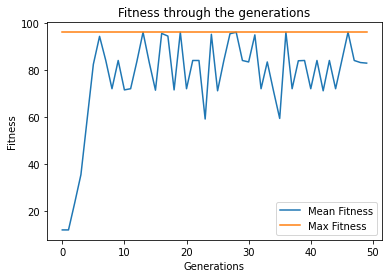

(50, 8)


In [164]:
fitness_history_mean = [np.mean(fitness) for fitness in fitness_history]
fitness_history_max = [np.max(fitness) for fitness in fitness_history]
plt.plot(list(range(num_generations)), fitness_history_mean, label = 'Mean Fitness')
plt.plot(list(range(num_generations)), fitness_history_max, label = 'Max Fitness')
plt.legend()
plt.title('Fitness through the generations')
plt.xlabel('Generations')
plt.ylabel('Fitness')
plt.show()
print(np.asarray(fitness_history).shape)